In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import pickle

In [2]:
train_joke_df = pd.read_csv(r'data\recsys-in-practice\train_joke_df.csv')

In [3]:
train_joke_df['UID'] = train_joke_df['UID'].astype(int)
train_joke_df['JID'] = train_joke_df['JID'].astype(int)

In [4]:
rows, r_pos = np.unique(train_joke_df.values[:,0], return_inverse=True)
cols, c_pos = np.unique(train_joke_df.values[:,1], return_inverse=True)

In [5]:
interactions_sparse = sparse.csr_matrix((train_joke_df.values[:,2], (r_pos, c_pos)) )

In [6]:
interactions_sparse

<24983x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1448364 stored elements in Compressed Sparse Row format>

In [7]:
Pui = normalize(interactions_sparse, norm='l2', axis=1)


#Похожесть айтемов между собой
sim = Pui.T * Pui

In [8]:

#Похожесть юзеров между собой
sim_users = Pui * Pui.T

In [13]:
u0_closest = [i for i in sim_users[0].toarray().argsort()[0][-10:]]
u0_closest

[1583, 18178, 4498, 8333, 18057, 15459, 15045, 2335, 6670, 0]

In [14]:
u0_far = [i for i in sim_users[0].toarray().argsort()[0][:10]]
u0_far

[20063, 15654, 24638, 2693, 9464, 11551, 8528, 22549, 10079, 10435]

In [15]:
train_joke_df_grouped = train_joke_df.groupby(by='UID').agg({'JID':set})

In [18]:
train_joke_df_grouped.loc[1].values

array([{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 41, 42, 43, 44, 45, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 70, 78, 82, 97}],
      dtype=object)

In [19]:
train_joke_df_grouped.loc[6671].values

array([{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 61, 63, 64, 65, 67, 69, 70, 89}],
      dtype=object)

In [30]:
train_joke_df_grouped.loc[20064].values

array([{1, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 86, 95, 96, 97, 98, 99, 100}],
      dtype=object)

In [25]:
sim_users[0].toarray()[0].argsort()

array([20063, 15654, 24638, ...,  2335,  6670,     0], dtype=int64)

In [28]:
sorted(list(sim_users[0].toarray()[0]))

[-0.48431775617561923,
 -0.4692526675061526,
 -0.4593242369454803,
 -0.45523536201449505,
 -0.4550576875603665,
 -0.4429766581910656,
 -0.4379268749293602,
 -0.43691328873402374,
 -0.42784880839255884,
 -0.4262921944396533,
 -0.42627624123855945,
 -0.4240050588135394,
 -0.4221536800884591,
 -0.42124349061286465,
 -0.4182294604714482,
 -0.4173772430260613,
 -0.4157526113185816,
 -0.4153053702273949,
 -0.4126982332151142,
 -0.4113948539147665,
 -0.40946007074864493,
 -0.4079477521708531,
 -0.4070623549704872,
 -0.4037442275482981,
 -0.4024151974043986,
 -0.39982319635678815,
 -0.3979961056246765,
 -0.39599329398737143,
 -0.3955971219012324,
 -0.3948992687637204,
 -0.39121387459213264,
 -0.3878521142816261,
 -0.3875165607208051,
 -0.38655229970763844,
 -0.38619725654452836,
 -0.3850198645200524,
 -0.3844713854302209,
 -0.382897486594557,
 -0.38064632696629047,
 -0.3804836905836211,
 -0.378073685265167,
 -0.3777296453748768,
 -0.3766342030025757,
 -0.3747770636475752,
 -0.373932125055246,


In [77]:
train_joke_df

,UID,JID,Rating
0,18029,6,-1.26
1,3298,64,-4.17
2,3366,58,0.92
3,12735,92,3.69
4,11365,38,-6.60
...,...,...,...
1448359,22604,26,2.82
1448360,22255,36,-1.94
1448361,21056,40,-9.56
1448362,12328,97,0.87


In [226]:
np.sum(np.abs(npusers[0] - npusers[1]))

715.1500000000002

In [263]:
users = {i:[0]*100 for i in range(24983)}
for row in tqdm(train_joke_df.values):
    users[int(row[0]) - 1][int(row[1]) - 1] = row[2]

  0%|          | 0/1448364 [00:00<?, ?it/s]

In [264]:
npusers = {k:np.array(users[k]) for k in users}

In [256]:
0 in npusers

True

In [221]:
npusers = np.array(users)

In [86]:
set(users[0].keys())

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 37,
 38,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 78,
 82,
 97}

In [83]:
users[6670]

{55.0: -8.16,
 54.0: 2.62,
 67.0: -7.91,
 41.0: -9.85,
 9.0: -8.5,
 35.0: -0.05,
 21.0: 0.92,
 52.0: -4.42,
 40.0: -5.0,
 7.0: -5.92,
 8.0: -2.52,
 25.0: -0.53,
 65.0: -3.11,
 51.0: -6.7,
 19.0: -9.71,
 61.0: -2.77,
 46.0: -3.88,
 36.0: 3.11,
 26.0: 1.26,
 11.0: -3.5,
 45.0: -5.29,
 4.0: -6.89,
 31.0: 0.97,
 20.0: -3.98,
 1.0: -1.6,
 57.0: -7.67,
 37.0: -8.98,
 42.0: -4.03,
 56.0: 1.8,
 44.0: -7.67,
 2.0: -4.9,
 49.0: 0.34,
 38.0: -4.71,
 34.0: -2.38,
 6.0: -5.15,
 5.0: -3.35,
 58.0: -5.73,
 28.0: -3.54,
 15.0: -7.04,
 3.0: -5.97,
 33.0: -8.06,
 18.0: -3.98,
 48.0: -3.59,
 10.0: 1.02,
 89.0: -3.64,
 29.0: -2.04,
 59.0: -7.23,
 23.0: -3.93,
 16.0: -9.37,
 13.0: -0.87,
 17.0: -3.74,
 64.0: -6.36,
 43.0: -6.46,
 69.0: 0.78,
 63.0: -6.02,
 32.0: -1.31,
 12.0: -3.06,
 24.0: -5.97,
 39.0: -2.86,
 22.0: -2.77,
 70.0: -1.36}

In [87]:
set([1, 2, 3, 4, 5, 6]).symmetric_difference(set([2,3,4,5,6,7,8]))

{1, 7, 8}

In [88]:
set([2,3,4,5,6,7,8]).symmetric_difference(set([1, 2, 3, 4, 5, 6]))

{1, 7, 8}

In [89]:
set([2,3,4,5,6,7,8]) - set([1, 2, 3, 4, 5, 6])

{7, 8}

In [90]:
set([1, 2, 3, 4, 5, 6]) - set([2,3,4,5,6,7,8])

{1}

In [91]:
set([2,3,4,5,6,7,8]).intersection(set([1, 2, 3, 4, 5, 6]))

{2, 3, 4, 5, 6}

In [92]:
set([1, 2, 3, 4, 5, 6]).intersection(set([2,3,4,5,6,7,8]))

{2, 3, 4, 5, 6}

In [96]:
u1 = {1:10, 2:5, 3:0, 4:-5, 5:-10}
print(u1)
u2 = {1:5, 2:5, 3:5, 4:5, 5:5}
print(u2)
u3 = {1:-10, 2:-5, 3:0, 4:5, 5:10}
print(u3)
u4 = {6:-10, 7:-5, 8:0, 9:5, 10:10}
print(u4)

{1: 10, 2: 5, 3: 0, 4: -5, 5: -10}
{1: 5, 2: 5, 3: 5, 4: 5, 5: 5}
{1: -10, 2: -5, 3: 0, 4: 5, 5: 10}
{6: -10, 7: -5, 8: 0, 9: 5, 10: 10}


In [179]:
np.array(list(u1.values())).mean(), np.array(list(u2.values())).mean()

(0.0, 5.0)

In [199]:
def length(u1, u2):
    ln = 0.0
    s1 = set(u1.keys())
    s2 = set(u2.keys())
    intersect = s1.intersection(s2)
    for k in intersect:
        ln += abs(u1[k] - u2[k])
        
    diff1 = s1 - s2
    for k in diff1:
        ln += abs(u1[k])
        

        
    diff2 = s2 - s1
    for k in diff2:
        ln += abs(u2[k])
        
    return ln / ( sum(np.abs((list(u1.values())))) + sum(np.abs((list(u2.values())))))
    

In [200]:
(length(u1, u2), length(u1, u3), length(u1, u4), length(u2, u3), length(u2, u4), length(u3, u4))

(0.6363636363636364, 1.0, 1.0, 0.6363636363636364, 1.0, 1.0)

In [201]:
(length(u1, u1), length(u2, u2), length(u3, u3), length(u4, u4))

(0.0, 0.0, 0.0, 0.0)

In [215]:
{k: users[0][k] for k in sorted(users[0].keys())}

{1: -7.82,
 2: 8.79,
 3: -9.66,
 4: -8.16,
 5: -7.52,
 6: -8.5,
 7: -9.85,
 8: 4.17,
 9: -8.98,
 10: -4.76,
 12: -6.75,
 13: -7.18,
 14: 8.45,
 15: -7.18,
 16: -7.52,
 17: -7.43,
 18: -9.81,
 20: -9.85,
 21: -9.37,
 22: 1.5,
 23: -4.37,
 24: -9.81,
 26: 1.12,
 27: 7.82,
 28: 2.86,
 29: 9.13,
 30: -7.43,
 32: -4.08,
 33: -9.08,
 35: 5.05,
 36: 4.95,
 37: -9.17,
 38: -8.4,
 41: -8.11,
 42: -9.13,
 43: -9.03,
 44: -9.08,
 45: -7.14,
 47: 3.79,
 48: -0.1,
 50: 4.13,
 51: -8.69,
 52: -7.14,
 53: 3.2,
 54: 8.3,
 55: -4.56,
 56: 0.92,
 57: -9.13,
 58: -9.42,
 59: 2.82,
 61: 8.59,
 62: 3.59,
 63: -6.84,
 64: -9.03,
 66: -1.36,
 67: -9.08,
 68: 8.3,
 69: 5.68,
 70: -4.81,
 78: -9.42,
 82: -7.72,
 97: -5.63}

In [214]:
{k: users[40][k] for k in sorted(users[40].keys())}

{1: -4.95,
 2: -2.86,
 3: 2.23,
 5: 5.44,
 6: 0.97,
 7: -0.97,
 8: -5.97,
 9: -8.74,
 10: -3.45,
 11: 2.52,
 12: -2.48,
 13: 1.07,
 14: 1.65,
 15: -1.89,
 16: -3.74,
 17: 1.75,
 19: 2.72,
 20: 3.11,
 21: 3.01,
 24: -8.06,
 25: -2.23,
 27: 7.57,
 28: -9.08,
 29: 5.97,
 30: -6.94,
 32: 8.45,
 33: -6.36,
 34: -2.52,
 35: 4.76,
 36: 8.69,
 37: -3.11,
 39: -0.15,
 40: 2.33,
 41: -5.39,
 42: 4.85,
 43: -4.42,
 45: 0.34,
 46: 0.0,
 47: 4.17,
 48: -1.55,
 49: 8.69,
 50: 8.35,
 51: -2.43,
 52: 6.07,
 53: 5.53,
 54: 6.02,
 55: -8.2,
 57: -7.48,
 58: -5.58,
 59: -4.37,
 60: -8.4,
 61: 4.85,
 63: -8.5,
 64: -8.01,
 66: 1.5,
 67: -8.93,
 69: -1.31,
 70: -1.02,
 86: 0.63,
 92: 1.36,
 99: 2.67}

In [291]:
for i in range(10):
    if i == 12:
        print('break')
        break
else:
    print('else')

else


In [14]:
closest_users03 = []
closest_users06 = []

user_len = np.zeros((24983,24983), dtype=np.half)
users_dict = {i:[0]*100 for i in range(24983)}
npusers_arr = np.zeros((24983, 100), dtype=np.half)

for row in tqdm(train_joke_df.values):
    users_dict[int(row[0]) - 1][int(row[1]) - 1] = row[2]
    npusers_arr[int(row[0]) - 1, int(row[1]) - 1] = row[2]
    
    
npusers_dict = {k:np.array(users_dict[k]) for k in users_dict}


  0%|          | 0/1448364 [00:00<?, ?it/s]

In [33]:
start, end = 0, 24983

for i in tqdm(range(start, end - 1)):
    for j in range(i + 1, end):
        
        l = np.sum(np.abs(npusers[i] - npusers[j])) / np.sum(np.abs(npusers[i]) + np.abs(npusers[j]))

        user_len[i, j] = l
        user_len[j, i] = l

        
with open('user_len.pkl', 'wb') as f:
    pickle.dump(user_len, f)

  0%|          | 0/24982 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [18]:
users_norm = np.linalg.norm(npusers_arr, axis=1)
users_norm.shape, users_norm[:3]

((24983,), array([57.4 , 51.47, 52.1 ], dtype=float16))

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

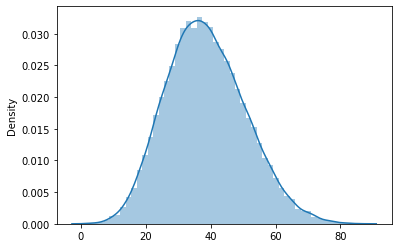

In [19]:
sns.distplot(users_norm)

In [20]:
npusers_arr[0]

array([-7.82,  8.79, -9.66, -8.16, -7.52, -8.5 , -9.85,  4.17, -8.98,
       -4.76,  0.  , -6.75, -7.18,  8.45, -7.18, -7.52, -7.43, -9.81,
        0.  , -9.85, -9.37,  1.5 , -4.37, -9.81,  0.  ,  1.12,  7.82,
        2.86,  9.13, -7.43,  0.  , -4.08, -9.08,  0.  ,  5.05,  4.95,
       -9.17, -8.4 ,  0.  ,  0.  , -8.11, -9.13, -9.03, -9.08, -7.14,
        0.  ,  3.79, -0.1 ,  0.  ,  4.13, -8.69, -7.14,  3.2 ,  8.3 ,
       -4.56,  0.92, -9.13, -9.42,  2.82,  0.  ,  8.59,  3.59, -6.84,
       -9.03,  0.  , -1.36, -9.08,  8.3 ,  5.68, -4.81,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  , -9.42,  0.  ,  0.  ,  0.  ,
       -7.72,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -5.63,  0.  ,  0.  ,
        0.  ], dtype=float16)

In [25]:
distance(npusers_arr[0], npusers_arr[1], users_norm[0], users_norm[1])

2.67

In [24]:
def distance(x, y, x_norm, y_norm):
    z = x - y
    l = np.sum(np.abs(z * z / (x_norm * y_norm)))
    return l

In [29]:
np.max(diff), np.min(diff), len(diff)

(36.84, 0.3767, 5740139)

In [32]:
np.mean(diff), np.median(diff)

(2.07, 2.004)

In [30]:
np.percentile(diff, 5), np.percentile(diff, 10), np.percentile(diff, 20)

(1.302734375, 1.453125, 1.6396484375)

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

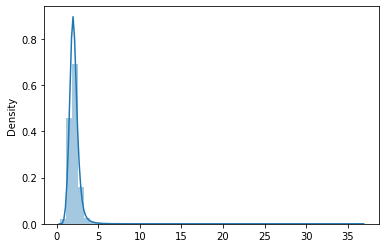

In [31]:
sns.distplot(diff)

In [34]:
start, end = 0, 24983

user_distance = np.zeros((24983,24983), dtype=np.half)
diff = []
for i in tqdm(range(start, end - 1)):
    for j in range(i + 1, end):
        
        l = distance(npusers_arr[i], npusers_arr[j], users_norm[i], users_norm[j])

        user_distance[i, j] = l
        user_distance[j, i] = l

        
with open('user_distance.pkl', 'wb') as f:
    pickle.dump(user_distance, f)

  0%|          | 0/24982 [00:00<?, ?it/s]

In [35]:

for i in tqdm(range(start, end - 1)):
    for j in range(i + 1, end):
        pass

  0%|          | 0/24982 [00:00<?, ?it/s]

In [36]:
closest_users100 = []
closest_users105 = []
closest_users110 = []
closest_users115 = []
closest_users120 = []
closest_users125 = []
closest_users130 = []
closest_users135 = []
closest_users140 = []
closest_users145 = []
closest_users150 = []
closest_users155 = []


start, end = 0, 24983

for i in tqdm(range(start, end - 1)):
    for j in range(i + 1, end):
        
        l = user_len[i, j]
        
        if l < 1:
            for s in closest_users100:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users100.append(set([i, j]))
                

        if l < 1.05:
            for s in closest_users105:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users105.append(set([i, j]))
                

        if l < 1.1:
            for s in closest_users110:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users110.append(set([i, j]))


        if l < 1.15:
            for s in closest_users115:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users115.append(set([i, j]))

        if l < 1.2:
            for s in closest_users120:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users120.append(set([i, j]))
           

        if l < 1.25:
            for s in closest_users125:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users125.append(set([i, j]))

        if l < 1.3:
            for s in closest_users130:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users130.append(set([i, j]))
                

        if l < 1.35:
            for s in closest_users135:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users135.append(set([i, j]))

        if l < 1.4:
            for s in closest_users140:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users140.append(set([i, j]))                
                

        if l < 1.45:
            for s in closest_users145:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users145.append(set([i, j]))

        if l < 1.5:
            for s in closest_users150:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users150.append(set([i, j]))                

  0%|          | 0/24982 [00:00<?, ?it/s]

In [41]:
[len(s) for s in closest_users100]

[24983]

In [301]:
start, end = 0, 24983

for i in tqdm(range(start, end - 1)):
    for j in range(i + 1, end):
        
        l = np.sum(np.abs(npusers[i] - npusers[j])) / np.sum(np.abs(npusers[i]) + np.abs(npusers[j]))

        user_len[i, j] = l
        user_len[j, i] = l
        
        if l < 0.3:
            for s in closest_users03:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users03.append(set([i, j]))
                
        if l < 0.6:
            for s in closest_users06:
                if i in s or j in s:
                    s.add(i)
                    s.add(j)
                    break
            else:
                closest_users06.append(set([i, j]))

  0%|          | 0/24982 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [294]:
with open('closest_users03.pkl', 'wb') as f:
    pickle.dump(closest_users03, f)

In [295]:
with open('closest_users06.pkl', 'wb') as f:
    pickle.dump(closest_users06, f)

In [297]:
sum([len(s) for s in closest_users03])

1323

In [298]:
sum([len(s) for s in closest_users06])

25788

In [299]:
[len(s) for s in closest_users06]

[24757,
 822,
 11,
 2,
 2,
 10,
 3,
 2,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 2,
 2,
 10,
 2,
 4,
 12,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 5,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [305]:
diff.shape

(624150289,)

In [280]:
len(npusers)

623

In [304]:
diff = user_len.flatten()

In [244]:
np.max(diff), np.min(diff)

(1.0, 0.25688468797836145)

In [240]:
len(diff)

1823623

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

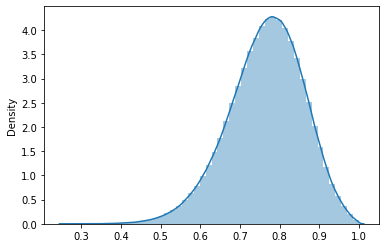

In [245]:
sns.distplot(diff)

In [306]:
(np.percentile(diff, 5), np.percentile(diff, 10), np.percentile(diff, 20), np.percentile(diff, 25), np.percentile(diff, 30))

(0.59423828125, 0.6357421875, 0.68359375, 0.701171875, 0.716796875)

In [307]:
(np.percentile(diff, 1), np.percentile(diff, 2), np.percentile(diff, 3), np.percentile(diff, 4))

(0.5126953125, 0.54541015625, 0.56640625, 0.58154296875)